In [163]:
import pickle

import matplotlib
matplotlib.use('Agg')
import os
import datetime
import numpy as np
import dill as pickle
import random
import sys
np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
#print(os.getcwd())
from codes.experimentclasses.RigidEthanolPCA import RigidEthanolPCA
from codes.otherfunctions.multirun import get_coeffs_reps_tangent
from codes.otherfunctions.multirun import get_grads_reps_pca2_tangent
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch_tangent
from codes.otherfunctions.get_dictionaries import get_atoms_4
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.get_grads_tangent import get_grads_tangent
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
import matplotlib.pyplot as plt
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.geometer.RiemannianManifold import RiemannianManifold
from collections import Counter

/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  after removing the cwd from sys.path.


In [164]:

def get_support(coeffs, dim):
    selected_functions = np.asarray(np.where(np.sum(np.sum(coeffs ** 2, axis=1), axis=1) > 0))

    sls = np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0]
    if len(sls) > 0:
        selection_lambda = np.min(sls)
        selected_functions_at_selection_lambda = selected_functions[1][
            np.where(selected_functions[0] == selection_lambda)[0]]

        return (selected_functions_at_selection_lambda)
    else:
        return(np.nan)


In [165]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/manifoldflasso_jmlr/Figures/ethanol/dim2May_31_2020_14_16_39/replicatesethanol_052820.pkl' ,
         'rb') as loader:
     replicates = pickle.load(loader)
supports = {}
for i in range(nreps):
    print(i)
    supports[i] = get_support(replicates[i].coeffs, dim)
#fig, ax = plt.figure(figsize=(15 , 15 ))
#plot_support_2d(supports, experiment.p)
#fig.savefig(folder + '/flasso_support')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [166]:
supports

{0: array([0, 9]),
 1: array([ 9, 11]),
 2: array([0, 9]),
 3: array([ 9, 10]),
 4: array([ 9, 10]),
 5: array([0, 9]),
 6: array([ 9, 10]),
 7: array([8, 9]),
 8: array([ 9, 10]),
 9: array([ 9, 11]),
 10: array([0, 9]),
 11: array([ 9, 11]),
 12: array([8, 9]),
 13: array([7, 9]),
 14: nan,
 15: array([ 9, 11]),
 16: nan,
 17: array([10, 11]),
 18: array([7, 9]),
 19: nan,
 20: nan,
 21: array([10, 11]),
 22: array([0, 9]),
 23: array([ 9, 11]),
 24: array([ 9, 11])}

In [167]:
import seaborn as sns
def plot_support_2d(supports, p):
    to_plot = np.zeros((p, p))
    support_indices = np.asarray(list(supports.values()))
    
    for i in range(len(support_indices)):
        if type(support_indices[i]) == np.ndarray:
            to_plot[support_indices[i][0], support_indices[i][1]] += 1
            to_plot[support_indices[i][1], support_indices[i][0]] += 1
    fig, ax = plt.subplots()
    sns.heatmap(to_plot, ax=ax)
    ax.set_xlabel('Dictionary function 1')
    ax.set_ylabel('Dictionary function 2')
    ax.set_title('Frequency of support selection', fontsize  = 16)
    #plt.colorbar(ax)
    #clb.ax.set_title(ax, 'Selection frequency')
    #plt.colorbar('hi')

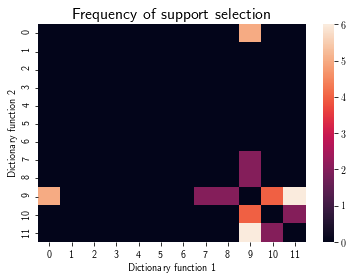

In [168]:
plot_support_2d(supports, p)

In [169]:
%matplotlib inline
m = 3
nsel = 100
fig, axes_all = plt.subplots(nreps, 1,figsize=(75, 150))
for i in range(nreps):
    #i = 15
    plot_reg_path_ax_lambdasearch_tangent(axes_all[i], replicates[i].coeffs, replicates[i].lambdas_plot * np.sqrt(m * nsel), fig)
    #i = 11
    #plot_reg_path_ax_lambdasearch_tangent(axes_all[1], replicates[i].coeffs, replicates[i].lambdas_plot * np.sqrt(m * nsel), fig)


fig.savefig('/Users/samsonkoelle/ethanolbetaspaths')
#    replicates[i].coeffs, replicates[i].lambdas_plot = get_coeffs_and_lambdas(replicates[i].coeff_dict, replicates[i].lower_lambda, replicates[i].higher_lambda)
#    plot_reg_path_ax_lambdasearch_tangent(axes_all[i], replicates[i].coeffs, replicates[i].lambdas_plot * np.sqrt(m * nsel), fig)
#fig.savefig(folder + '/beta_paths')

/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


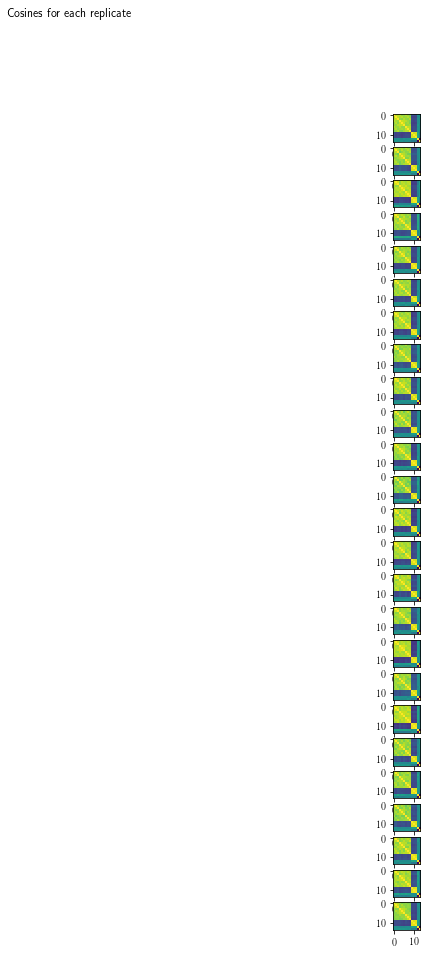

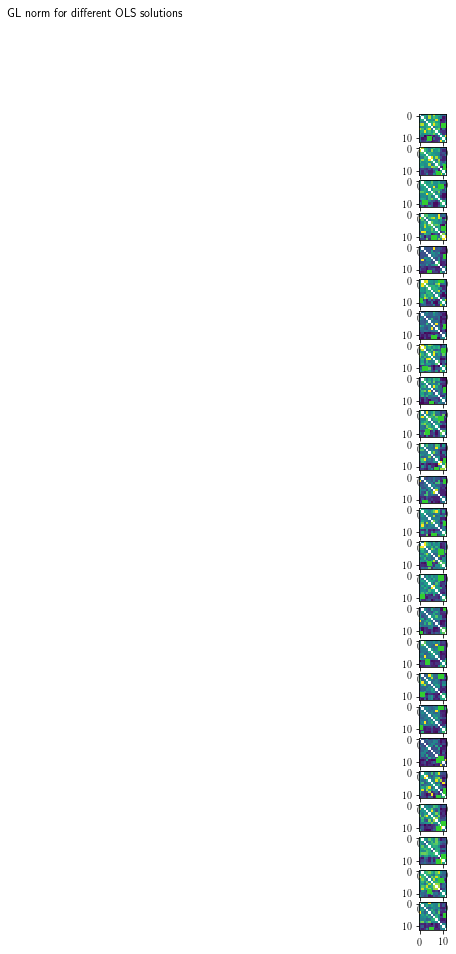

In [145]:

fig, axes_all = plt.subplots(nreps,figsize=(15*nreps,15))
fig.suptitle('Cosines for each replicate')
for i in range(nreps):
    full = np.concatenate([replicates[i].dg_M, np.swapaxes(replicates[i].df_M,1,2)],1)
    asdf = get_cosines(full)
    axes_all[i].imshow(asdf)
fig.savefig('/Users/samsonkoelle/cosinesssss')

ols_norm, supports_brute = get_olsnorm_and_supportsbrute(experiment,replicates)


fig, axes_all = plt.subplots(nreps,figsize=(15*nreps,15))
fig.suptitle('GL norm for different OLS solutions')
for r in range(nreps):
    axes_all[r].imshow(np.log(ols_norm[r]))
    highlight_cell(supports_brute[r][1],supports_brute[r][0],color="limegreen", linewidth=3,ax=axes_all[r])
    highlight_cell(supports_brute[r][0],supports_brute[r][1],color="limegreen", linewidth=3,ax=axes_all[r])
fig.savefig('/Users/samsonkoelle/olsnormssssss')

# fig, ax = plt.figure(figsize=(15 , 15 ))
# plot_support_2d(supports_brute, experiment.p)
# fig.savefig('/Users/samsonkoelle/ols_supportsssssssss')


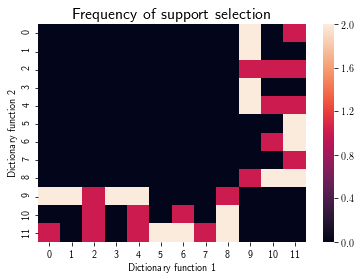

In [146]:
#fig, ax = plt.figure(figsize=(15 , 15 ))
plot_support_2d(supports_brute, experiment.p)
#fig.savefig('/Users/samsonkoelle/ols_supportsssssssss')


In [178]:
with open('/Users/samsonkoelle/manifoldflasso_jmlr/Figures/rigidethanol/dim2May_31_2020_14_16_42n10000nsel100nreps25/replicatesrigidethanol_032520.pkl' ,
         'rb') as loader:
     replicates = pickle.load(loader)
supports = {}
for i in range(nreps):
    print(i)
    supports[i] = get_support(replicates[i].coeffs, dim)
#fig, ax = plt.figure(figsize=(15 , 15 ))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [179]:
replicates[i].coeffs

array([[[[-7.70195425e-02, -1.23959240e-02,  1.85640492e-02, ...,
          -6.31902981e+00,  6.35005522e+00, -6.15308714e+00],
         [ 1.75375617e+00, -1.60243309e+00, -1.61257613e+00, ...,
           1.19241154e+00,  1.20859313e+00, -1.16748071e+00],
         [-1.79010737e+00,  1.64757442e+00, -1.65506709e+00, ...,
          -3.38915169e-01,  3.43757898e-01, -3.36514533e-01],
         ...,
         [ 2.93027908e-01, -2.58217514e-01,  2.58242995e-01, ...,
          -5.82515001e+00, -5.89127398e+00,  5.70535803e+00],
         [-1.85400844e+00, -1.70453465e+00,  1.71353412e+00, ...,
          -3.89088452e-01, -3.97244126e-01,  3.77334565e-01],
         [ 1.64650571e+00, -1.49023986e+00,  1.49476278e+00, ...,
          -1.67127955e+00, -1.69498408e+00,  1.64004791e+00]],

        [[ 1.43978250e+00, -1.31098509e+00,  1.31464899e+00, ...,
           9.63287279e-02, -8.40232372e-02,  7.39055574e-02],
         [-3.61036807e-01,  3.42587292e-01,  3.42681199e-01, ...,
           4.12385225e

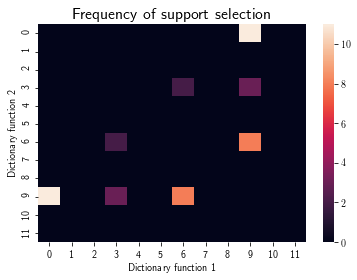

In [174]:
plot_support_2d(supports, p)

In [175]:
supports

{0: array([6, 9]),
 1: array([3, 9]),
 2: array([3, 9]),
 3: array([0, 9]),
 4: array([3, 6]),
 5: array([3, 9]),
 6: array([3, 6]),
 7: array([0, 9]),
 8: array([0, 9]),
 9: array([0, 9]),
 10: array([0, 9]),
 11: array([0, 9]),
 12: array([6, 9]),
 13: array([0, 9]),
 14: array([6, 9]),
 15: array([6, 9]),
 16: array([0, 9]),
 17: array([6, 9]),
 18: array([0, 9]),
 19: array([0, 9]),
 20: nan,
 21: array([6, 9]),
 22: array([6, 9]),
 23: array([6, 9]),
 24: array([0, 9])}

In [156]:


def get_penalty(coeffs):
    pen = np.sum(np.linalg.norm(coeffs, axis=1))
    return (pen)


def cosine_similarity(a, b):
    output = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return (output)


# def get_cosines(self, dg):
def get_cosines(dg):
    n = dg.shape[0]
    p = dg.shape[1]
    d = dg.shape[2]

    coses = np.zeros((n, p, p))
    for i in range(n):
        for j in range(p):
            for k in range(p):
                coses[i, j, k] = cosine_similarity(dg[i, j, :], dg[i, k,
                                                                :])  # sklearn.metrics.pairwise.cosine_similarity(X = np.reshape(dg[:,i,:], (1,d*n)),Y = np.reshape(dg[:,j,:], (1,d*n)))[0][0]
    # cos_summary = np.abs(coses).sum(axis = 0) / n
    cos_summary = np.sum(coses ** 2, axis=0) / n
    return (cos_summary)


In [157]:


#rootdirectory = '/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients'
#f = open(rootdirectory + '/code/source/packagecontrol.py')
#source = f.read()
#exec(source)
#f = open(rootdirectory + '/code/source/sourcecontrol.py')
#source = f.read()
#exec(source)
#f = open(rootdirectory + '/code/source/RigidEthanol.py')
#source = f.read()
#exec(source)
import matplotlib
matplotlib.use('Agg')
import os
import datetime
import numpy as np
import dill as pickle
import random
import sys
np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
#print(os.getcwd())
from codes.experimentclasses.RigidEthanolPCA import RigidEthanolPCA
from codes.otherfunctions.multirun import get_coeffs_reps_tangent
from codes.otherfunctions.multirun import get_grads_reps_pca2_tangent
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch_tangent
from codes.otherfunctions.get_dictionaries import get_atoms_4
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.get_grads_tangent import get_grads_tangent
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
import matplotlib.pyplot as plt
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.geometer.RiemannianManifold import RiemannianManifold
from collections import Counter

#set parameters
n = 10000 #number of data points to simulate
nsel = 100 #number of points to analyze with lasso
itermax = 1000 #maximum iterations per lasso run
tol = 1e-10 #convergence criteria for lasso
#lambdas = np.asarray([0,.01,.1,1,10,100], dtype = np.float16)#lambda values for lasso
#lambdas = np.asarray(np.hstack([np.asarray([0]),np.logspace(-3,1,11)]), dtype = np.float16)
#lambdas = np.asarray(np.hstack([np.asarray([0]),np.logspace(-3,0,7), np.logspace(0,2,5),np.logspace(2,3,2)]), dtype = np.float16)
lambdas = np.asarray(np.hstack([np.asarray([0]),np.logspace(-2,1,15)]), dtype = np.float16)
n_neighbors = 1000 #number of neighbors in megaman
n_components = 3 #number of embedding dimensions (diffusion maps)
#diffusion_time = 1. #diffusion time controls gaussian kernel radius per gradients paper
#diffusion_time =.05 #(yuchia suggestion)
diffusion_time =.25 #(yuchia suggestion)
dim = 2 #manifold dimension
dimnoise = 2
cores = 3 #number of cores for parallel processing
cor = 0.0 #correlation for noise
var = 0.00001 #variance scaler for noise
ii = np.asarray([0,0,0,0,1,1,1,2]) # atom adjacencies for dihedral angle computation
jj = np.asarray([1,2,3,4,5,6,7,8])

#run experiment
atoms4 = np.asarray([[6,1,0,4],[4,0,2,8],[7,6,5,1],[3,0,2,4]],dtype = int)

m = 3
new_MN = True
new_grad = True
savename = 'rigidethanol_032520'
savefolder = 'rigidethanol'
loadfolder = 'rigidethanol'
loadname = 'rigidethanol_032520'
nreps = 25
atoms4,p = get_atoms_4(9,ii,jj)
folder = workingdirectory + '/Figures/rigidethanol/' + now + 'n' + str(n) + 'nsel' + str(nsel) + 'nreps' + str(nreps)
os.mkdir(folder)

if new_MN == True:
    experiment = RigidEthanolPCA(dim, cor,var,ii,jj, cores, False, atoms4)

/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  


In [158]:

def highlight_cell(x,y, ax=None, **kwargs):
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect

In [159]:
experiment.dnoise = 2
experiment.nreps = 25
experiment.nsel = 100
from itertools import combinations
experiment.q = 2

/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/Users/samsonkoelle/anaconda3/envs/manifold_env_april/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


TypeError: 'Figure' object is not iterable

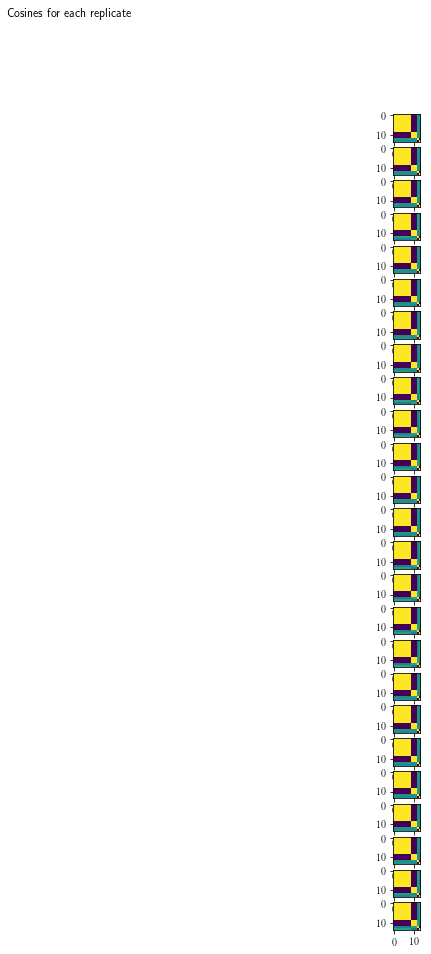

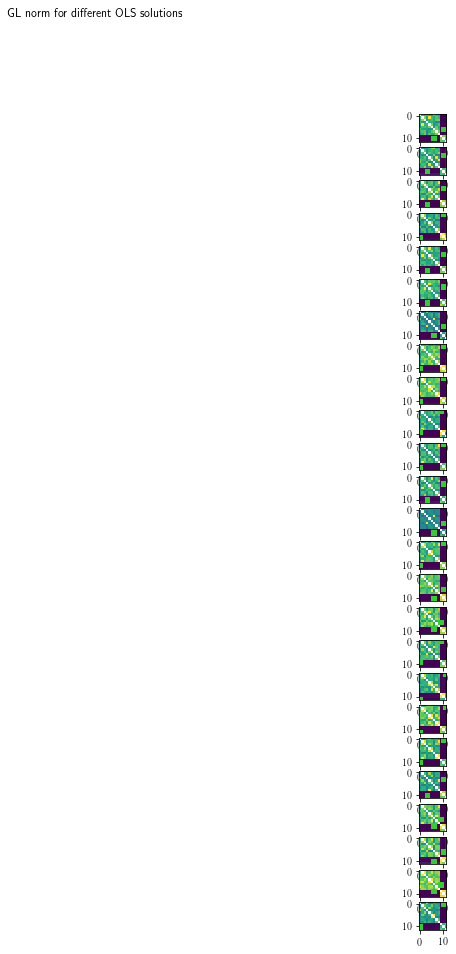

<Figure size 1080x1080 with 0 Axes>

In [160]:

fig, axes_all = plt.subplots(nreps,figsize=(15*nreps,15))
fig.suptitle('Cosines for each replicate')
for i in range(nreps):
    full = np.concatenate([replicates[i].dg_M, np.swapaxes(replicates[i].df_M,1,2)],1)
    asdf = get_cosines(full)
    axes_all[i].imshow(asdf)
fig.savefig('/Users/samsonkoelle/cosinesssss')

ols_norm, supports_brute = get_olsnorm_and_supportsbrute(experiment,replicates)


fig, axes_all = plt.subplots(nreps,figsize=(15*nreps,15))
fig.suptitle('GL norm for different OLS solutions')
for r in range(nreps):
    axes_all[r].imshow(np.log(ols_norm[r]))
    highlight_cell(supports_brute[r][1],supports_brute[r][0],color="limegreen", linewidth=3,ax=axes_all[r])
    highlight_cell(supports_brute[r][0],supports_brute[r][1],color="limegreen", linewidth=3,ax=axes_all[r])
fig.savefig('/Users/samsonkoelle/olsnormssssss')

fig, ax = plt.figure(figsize=(15 , 15 ))
plot_support_2d(supports_brute, experiment.p)
fig.savefig('/Users/samsonkoelle/ols_supportsssssssss')


In [ ]:

def get_olsnorm_and_supportsbrute(experiment, replicates):
    dim = experiment.dim
    dnoise = experiment.dnoise
    nreps = experiment.nreps
    nsel = experiment.nsel
    p = experiment.p

    parameterizations_possible = np.asarray(list(combinations(range(experiment.p), dnoise)))
    nparameterizations_possible = parameterizations_possible.shape[0]
    supports_brute = {}
    penalties = np.zeros((nreps, nparameterizations_possible))
    ols_norm = np.zeros((nreps, p, p))
    for r in range(nreps):
        brute_coeffs = np.zeros((nsel, nparameterizations_possible, experiment.dim, experiment.q))
        orthogonality = np.zeros((nsel, nparameterizations_possible))
        for i in range(nsel):
            for j in range(nparameterizations_possible):
                brute_coeffs[i, j] = np.linalg.lstsq(replicates[r].dg_M[i, parameterizations_possible[j], :], replicates[r].df_M[i])[0]
                # orthogonality[i,j] = get_penalty(brute_coeffs[i,j])
        for j in range(nparameterizations_possible):
            penalties[r, j] = experiment.compute_penalty2(np.expand_dims(brute_coeffs[:, j], 0))
        for j in range(nparameterizations_possible):
            ols_norm[r, parameterizations_possible[j][0], parameterizations_possible[j][1]] = penalties[r, j]
            ols_norm[r, parameterizations_possible[j][1], parameterizations_possible[j][0]] = penalties[r, j]
        supports_brute[r] = parameterizations_possible[penalties[r, :].argmin()]
    return (ols_norm, supports_brute)


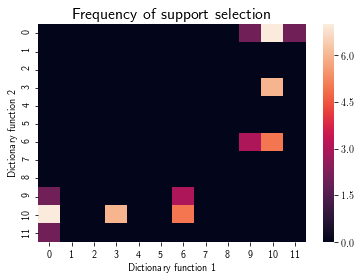

In [161]:
#fig, ax = plt.figure(figsize=(15 , 15 ))
plot_support_2d(supports_brute, experiment.p)
#fig.savefig('/Users/samsonkoelle/ols_supportsssssssss')


In [176]:
with open('/Users/samsonkoelle/manifoldflasso_jmlr/Figures/rigidethanol/dim2p0001May_31_2020_20_07_36n10000nsel100nreps25/replicatesrigidethanol_032520_2_p0001.pkl' ,
         'rb') as loader:
     replicates = pickle.load(loader)
supports = {}
for i in range(nreps):
    print(i)
    supports[i] = get_support(replicates[i].coeffs, dim)
#fig, ax = plt.figure(figsize=(15 , 15 ))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


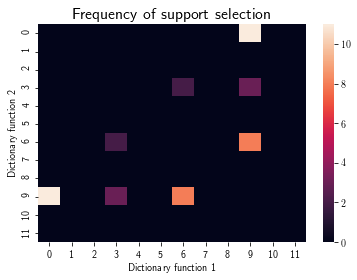

In [171]:
plot_support_2d(supports, p)

In [172]:
supports

{0: array([6, 9]),
 1: array([3, 9]),
 2: array([3, 9]),
 3: array([0, 9]),
 4: array([3, 6]),
 5: array([3, 9]),
 6: array([3, 6]),
 7: array([0, 9]),
 8: array([0, 9]),
 9: array([0, 9]),
 10: array([0, 9]),
 11: array([0, 9]),
 12: array([6, 9]),
 13: array([0, 9]),
 14: array([6, 9]),
 15: array([6, 9]),
 16: array([0, 9]),
 17: array([6, 9]),
 18: array([0, 9]),
 19: array([0, 9]),
 20: nan,
 21: array([6, 9]),
 22: array([6, 9]),
 23: array([6, 9]),
 24: array([0, 9])}

In [177]:
replicates[i].coeffs

array([[[[-7.70195425e-02, -1.23959240e-02,  1.85640492e-02, ...,
          -6.31902981e+00,  6.35005522e+00, -6.15308714e+00],
         [ 1.75375617e+00, -1.60243309e+00, -1.61257613e+00, ...,
           1.19241154e+00,  1.20859313e+00, -1.16748071e+00],
         [-1.79010737e+00,  1.64757442e+00, -1.65506709e+00, ...,
          -3.38915169e-01,  3.43757898e-01, -3.36514533e-01],
         ...,
         [ 2.93027908e-01, -2.58217514e-01,  2.58242995e-01, ...,
          -5.82515001e+00, -5.89127398e+00,  5.70535803e+00],
         [-1.85400844e+00, -1.70453465e+00,  1.71353412e+00, ...,
          -3.89088452e-01, -3.97244126e-01,  3.77334565e-01],
         [ 1.64650571e+00, -1.49023986e+00,  1.49476278e+00, ...,
          -1.67127955e+00, -1.69498408e+00,  1.64004791e+00]],

        [[ 1.43978250e+00, -1.31098509e+00,  1.31464899e+00, ...,
           9.63287279e-02, -8.40232372e-02,  7.39055574e-02],
         [-3.61036807e-01,  3.42587292e-01,  3.42681199e-01, ...,
           4.12385225e